In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
df = pd.read_csv("car_fuel_efficiency.csv")
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df = df.fillna(0)
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [5]:
df_full_train , df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [6]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [7]:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

In [8]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [ ]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [10]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


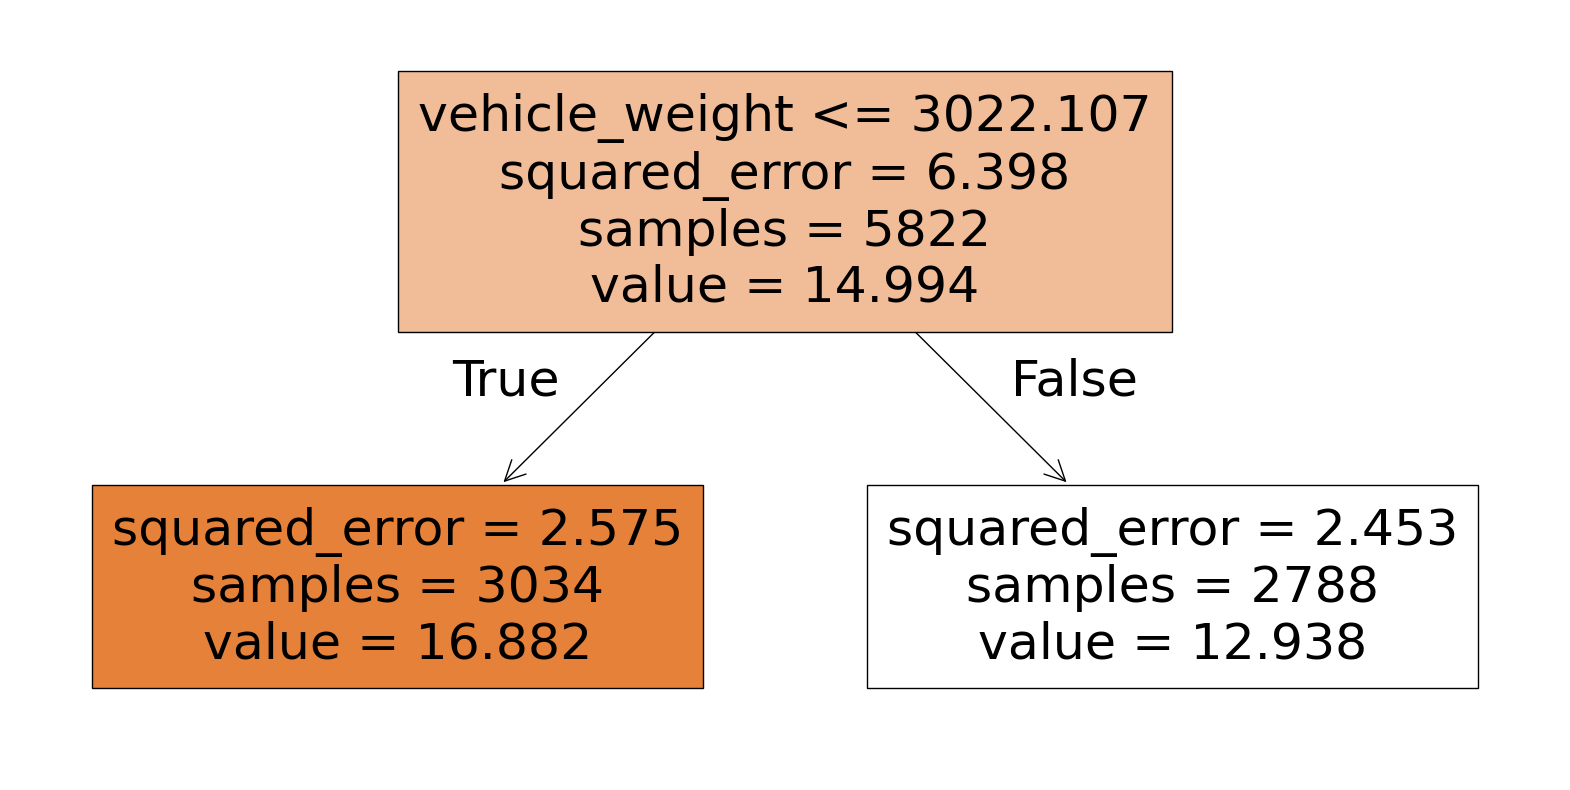

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=dv.get_feature_names_out(), filled=True)
plt.show()

In [12]:
from sklearn.tree import export_text
print(export_text(model, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



In [46]:
from sklearn.ensemble import RandomForestRegressor

rmse = []

for n in range(10, 201, 10):
    model = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse.append((n, np.sqrt(mean_squared_error(y_val, preds))))



In [48]:
df_rmse = pd.DataFrame(rmse, columns=['n_estimator', 'RMSE Score'])
df_rmse.round(3)

,n_estimator,RMSE Score
0,10,0.460
1,20,0.454
2,30,0.451
3,40,0.448
4,50,0.446
5,60,0.445
6,70,0.445
7,80,0.445
8,90,0.445
9,100,0.444


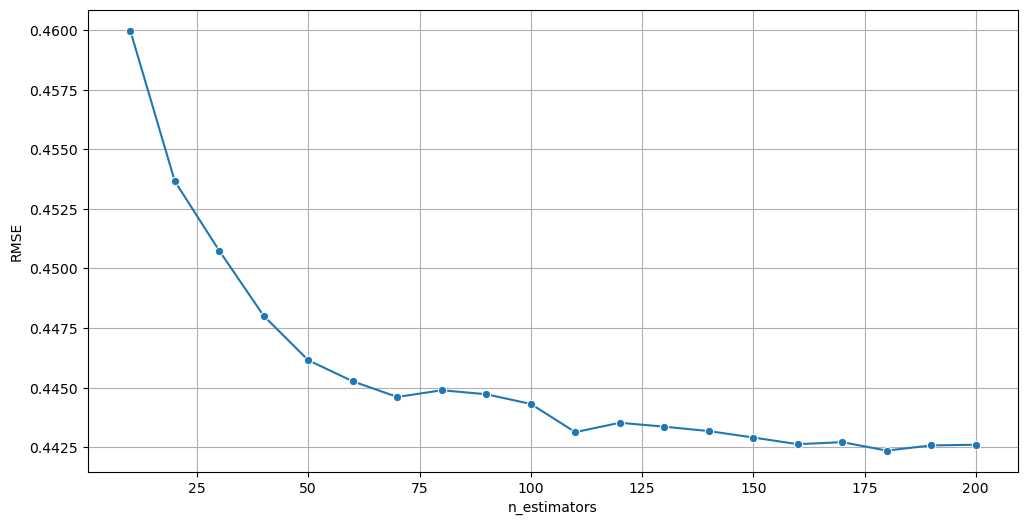

In [55]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_rmse,
    x="n_estimator",
    y="RMSE Score",
    marker="o",
)
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

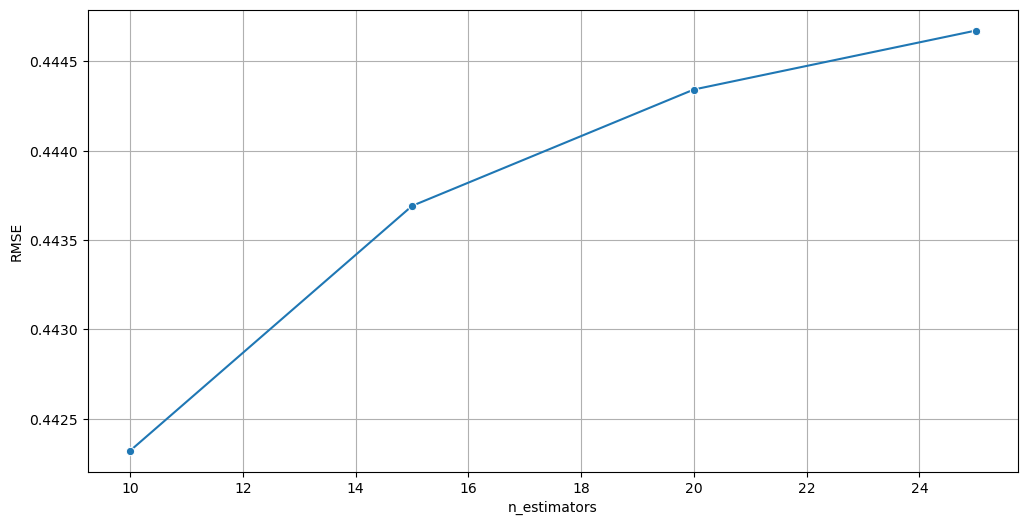

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_rmse,
    x="max_depth",
    y="RMSE Score",
    marker="o",
)
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

In [56]:
rmse = []
temp_score = []

for d in [10, 15, 20,25]:
    for n in range(10, 201, 10):
        model = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1, n_jobs=-1)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        temp_score.append(np.sqrt(mean_squared_error(y_val, preds)))
    rmse.append((d, np.array(temp_score).mean()))


In [58]:
df_rmse = pd.DataFrame(rmse, columns=['max_depth', 'RMSE Score'])
df_rmse

,max_depth,RMSE Score
0,10,0.442321
1,15,0.443691
2,20,0.444342
3,25,0.444672


In [43]:
model = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)
model.fit(X_train, y_train)
df_fi = pd.DataFrame({
    'Features': dv.get_feature_names_out(),
    'Importance': model.feature_importances_
})
df_fi.sort_values(by='Importance', ascending=False)
# print(f'Columns: {len(cols)}')
# print(f'Importance Array: {len(model.feature_importances_)}')

,Features,Importance
13,vehicle_weight,0.959162
6,horsepower,0.016040
0,acceleration,0.011471
3,engine_displacement,0.003269
7,model_year,0.003182
8,num_cylinders,0.002359
9,num_doors,0.001591
12,origin=USA,0.000555
11,origin=Europe,0.000520
10,origin=Asia,0.000476


In [82]:
import xgboost as xgb

scores = []
features = list(dv.get_feature_names_out())

d_train = xgb.DMatrix(X_train, label=y_train, feature_names=features)
d_val = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [85]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [86]:
model_xgb = xgb.train(xgb_params, d_train, num_boost_round=100)

preds = model_xgb.predict(d_val)
scores.append((xgb_params['eta'], np.sqrt(mean_squared_error(y_val, preds))))

In [87]:
scores

[(0.1, np.float64(0.42622800553359225)),
 (0.3, np.float64(0.45017755678087246))]